**LIBRARIES**

In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
import seaborn as sns

**DATA**

In [ ]:

df=pd.read_csv('/content/full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


**Data Preprocessing**

In [ ]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  4981
Columns  :  11

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   0

Unique values :  
 gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64


In [ ]:
age_outliers=df.loc[df['age']>70]
age_outliers['bmi'].shape

(707,)

In [ ]:
# mean with outliers 
print(age_outliers['stroke'].value_counts())

0    579
1    128
Name: stroke, dtype: int64


In [ ]:
df["age"] = df["age"].apply(lambda x: 70 if x>570 else x)
df["age"] = df["age"].fillna(28.4)

In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [ ]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2767  140
               Male             1966  108
Residence_type Rural            2336  113
               Urban            2397  135
smoking_status Unknown          1453   47
               formerly smoked   797   70
               never smoked     1749   89
               smokes            734   42

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [ ]:
df


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,1,0,0
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,0,0,1,0,0,0,1,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,0,0,0,0,1,0,1,0,0
4978,0,45.0,1,0,1,0,95.02,31.8,0,0,0,0,1,1,0,0,0
4979,1,40.0,0,0,1,0,83.94,30.0,0,0,0,0,1,0,1,0,0


In [ ]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,2.723411,1.193238,1.040584
1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,-0.000523,0.589390,1.614270
2,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1.448529,0.869222,0.246250
3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1.512650,-0.662492,1.570141
4,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1.780895,0.073909,1.658400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,0,0,0,0,0,1,0,0,0,1,0,0,-0.794162,0.191733,-0.106788
4977,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1.890500,0.383197,-0.150917
4978,0,1,0,1,0,0,0,0,0,1,1,0,0,0,-0.242364,0.486294,0.069731
4979,1,0,0,1,0,0,0,0,0,1,0,1,0,0,-0.488199,0.221189,-0.150917


In [ ]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

:**Model Implimentation**

In [ ]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:
    
    models[model].fit(X_train, y_train)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
KMeans model fitting completed.


Test Set Prediction:

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       0.00      0.00      0.00        11

    accuracy                           0.96       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.96      0.93       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


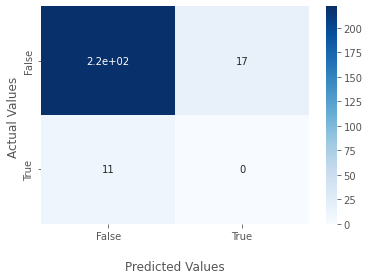

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       239
           1       0.00      0.00      0.00        11

    accuracy                           0.89       250
   macro avg       0.48      0.46      0.47       250
weighted avg       0.91      0.89      0.90       250



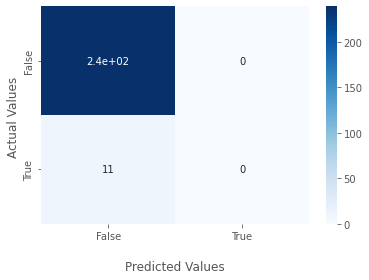

--------------------Support Vector Machine--------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       0.00      0.00      0.00        11

    accuracy                           0.96       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.96      0.93       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


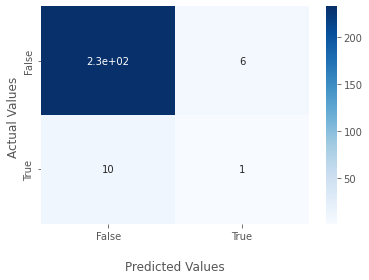

--------------------kNN--------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       239
           1       0.14      0.09      0.11        11

    accuracy                           0.94       250
   macro avg       0.55      0.53      0.54       250
weighted avg       0.92      0.94      0.93       250



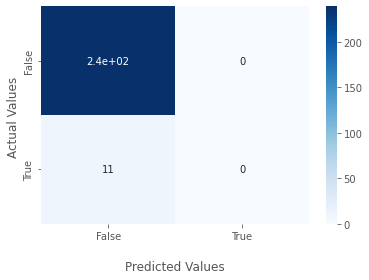

--------------------Naive Bayes--------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       0.00      0.00      0.00        11

    accuracy                           0.96       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.96      0.93       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


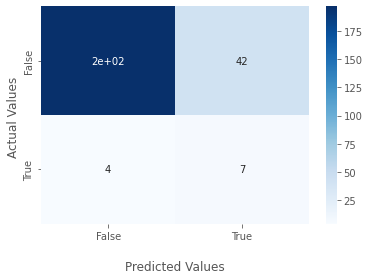

--------------------KMeans--------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.90       239
           1       0.14      0.64      0.23        11

    accuracy                           0.82       250
   macro avg       0.56      0.73      0.56       250
weighted avg       0.94      0.82      0.87       250



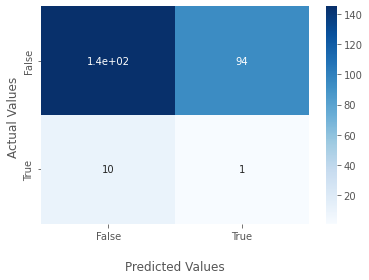

In [ ]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(classification_report(**arg_test))
    y_pred = models[x].predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()


**Logistic Regression**

Testing Score 
 0.956
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       0.00      0.00      0.00        11

    accuracy                           0.96       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.96      0.93       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


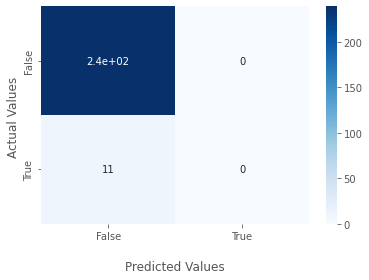

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


**Ensemble Voting Model **

ACCURACY OF THE MODEL:  0.956


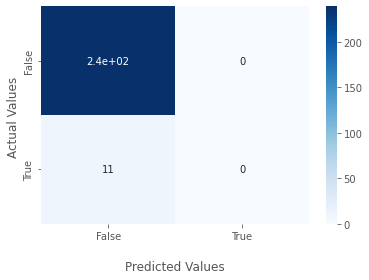

In [ ]:
LogisticRegression(class_weight='balanced')
logistic_regression = LogisticRegression(max_iter=1000);
random_forest = RandomForestClassifier(n_estimators = 200);
knn           = KNeighborsClassifier(n_neighbors=3);
model = VotingClassifier (estimators=[('lr',logistic_regression), ('rf', random_forest), ('knn',knn)], voting='soft')
model.fit(X_train, y_train);
y_pred = model.predict(X_test);
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred));
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
